<a href="https://colab.research.google.com/github/Vixuz144/Simulaci-n-2/blob/main/Copia_de_portafolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime

In [2]:
tickers = ['PG', 'MSFT', 'F', 'GE']
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2024,1,1)
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = yf.download(t, start=start, end=end)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3522 entries, 2010-01-04 to 2023-12-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      3522 non-null   float64
 1   MSFT    3522 non-null   float64
 2   F       3522 non-null   float64
 3   GE      3522 non-null   float64
dtypes: float64(4)
memory usage: 137.6 KB


In [4]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
2010-01-04,39.902405,23.389399,5.846006,50.052280
2010-01-05,39.915455,23.396957,6.232706,50.311428
2010-01-06,39.726147,23.253368,6.465865,50.052280
2010-01-07,39.510693,23.011543,6.630783,52.643970
2010-01-08,39.458466,23.170242,6.647838,53.777840


In [5]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2023-12-22,143.442017,373.215393,11.881211,100.850426
2023-12-26,144.093689,373.295135,11.977414,101.471336
2023-12-27,144.212158,372.707275,11.919693,102.132759
2023-12-28,143.886322,373.912842,11.871591,102.228363
2023-12-29,144.686081,374.670074,11.727283,101.678658


Normalización a 100:$$\frac{P_i}{P_0}*100$$

In [6]:
mydata.iloc[0]

PG      39.902405
MSFT    23.389399
F        5.846006
GE      50.052280
Name: 2010-01-04 00:00:00, dtype: float64

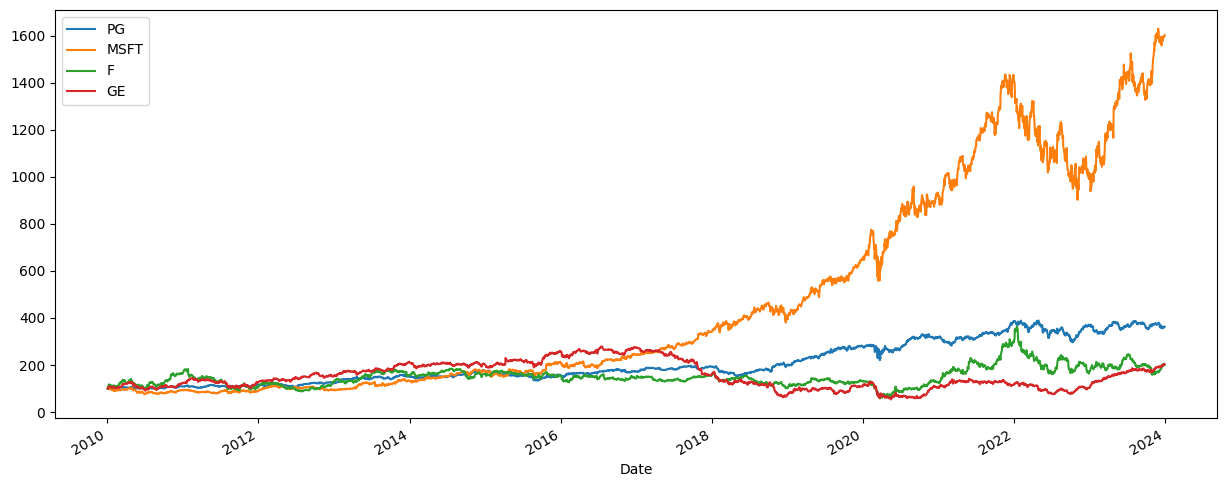

In [7]:
(mydata / mydata.iloc[0]*100).plot(figsize=(15,6))
plt.show()

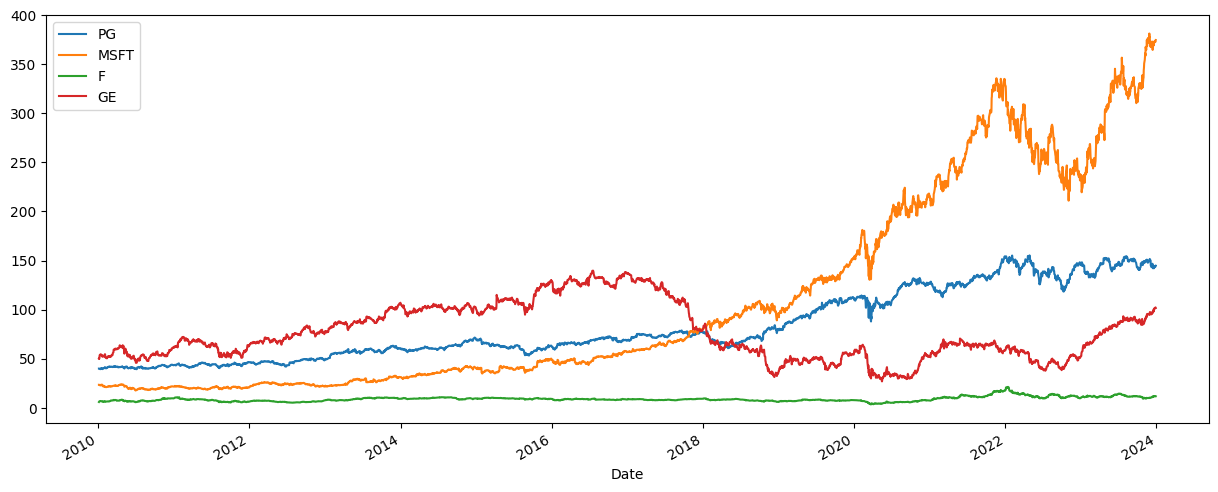

In [8]:
mydata.plot(figsize=(15,6))
plt.show()

In [9]:
mydata.loc['2010-01-04']

PG      39.902405
MSFT    23.389399
F        5.846006
GE      50.052280
Name: 2010-01-04 00:00:00, dtype: float64

In [10]:
mydata.iloc[0]

PG      39.902405
MSFT    23.389399
F        5.846006
GE      50.052280
Name: 2010-01-04 00:00:00, dtype: float64

### Calculo de los retornos de un portafolio

In [11]:
returns = (mydata / mydata.shift(1))-1
returns.head()

,PG,MSFT,F,GE
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.000327,0.000323,0.066148,0.005178
2010-01-06,-0.004743,-0.006137,0.037409,-0.005151
2010-01-07,-0.005423,-0.010400,0.025506,0.051780
2010-01-08,-0.001322,0.006896,0.002572,0.021538


In [12]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [13]:
print(weights)

[0.25 0.25 0.25 0.25]


In [14]:
np.dot(returns,weights)

array([        nan,  0.01799384,  0.00534459, ...,  0.00023663,
       -0.00053107, -0.00248737])

In [15]:
annual_returns= returns.mean()*250
print(annual_returns)

PG      0.106188
MSFT    0.230358
F       0.106942
GE      0.099457
dtype: float64


In [16]:
np.dot(annual_returns, weights)

0.13573644976180288

In [17]:
pfolio_1 = str(round(np.dot(annual_returns, weights) * 100, 5)) + '%'
print(pfolio_1)

13.57364%


In [18]:
weights_2= np.array([0.4, 0.4, 0.15, 0.05])

In [19]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2) * 100, 5)) + '%'
print(pfolio_1)
print(pfolio_2)

13.57364%
15.56329%


#Sección del algoritmo genético

Recordemos la idea de Darwin acerca la evolución de las especies conforme a su entorno.

In [20]:
import numpy as np
from random import random, randint

##Cruza o recombinación
Nos dice que a partir de dos individuos (datos) se puede producir uno nuevo que comparta características de los dos originales

In [21]:
def cruza_poblacion_v1(poblacion, prob = [1/3, 2/3]):
  p = np.array(poblacion)
  n = len(p[0,:])
  r = np.random.random((2,n))
  par = np.argsort(r,axis = 1)
  padres = p[:,par[0,:]]
  madres = p[:,par[1,:]]
  for p in prob:
    try:
      hijos = np.append(hijos, p*madres + (1-p)*padres, axis = 1)
    except:
      hijos = p*madres + (1-p)*padres
  return hijos

In [22]:
def cruza_poblacion_v2(poblacion, prob = [1/3, 2/3]):
  p = np.array(poblacion)
  n = len(p[0,:])
  r = np.random.random(n)
  r1 = np.argsort(r)
  r2 = []
  for i in r1:
    r = np.pi
    while r != i:
      r = randint(0,n-1)
    r2.append(r)
  r2 = np.array(r2)
  padres = p[:,r1]
  madres = p[:,r2]

  for p in prob:
    try:
      hijos = np.hstack((hijos, p*madres + (1-p)*padres))
    except:
      hijos = p*madres + (1-p)*padres
  return hijos

In [23]:
def cruza_poblacion_v3(poblacion, prob = [1/3, 2/3]):
  p = np.array(poblacion)
  n = len(p[0,:])
  r = np.random.random(n)
  r1 = np.argsort(r)
  r2 = r1[-1:n:1]
  padres = p[:,r1]
  madres = p[:,r2]

  for p in prob:
    try:
      hijos = np.append(hijos, p*madres + (1-p)*padres, axis = 1)
    except:
      hijos = p*madres + (1-p)*padres
  return hijos

##Mutación
Nacen, se crean raritos.

In [24]:
def mutacion_suma(l = np.array([1/4, 1/4, 1/4, 1/4]), intensidad = 0.1):
  n = len(l)
  i = randint(0,n-1)
  nl = l - intensidad
  nl[i] += intensidad*n
  while np.any(nl < 0):
    nl -= min(nl)
  return nl/sum(nl)

In [25]:
def mutacion_promedio(l = np.array([1/4, 1/4, 1/4, 1/4]), pond = 1/2):
  l = np.array(l)
  n = len(l)
  p = np.random.random(n)
  l = l[list(np.argsort(p))]
  nl = []
  for i in range(n):
    nl.append(l[i]*pond + l[i-1]*(1-pond))
  return np.array(nl)

##Seleccion
Solo se seleccionan a los más aptos.

In [26]:
def seleccion(lista_participantes, n_ganadores, f_evaluacion, min = True):
  l = np.array(lista_participantes)
  puntuacion = f_evaluacion(l)
  if min:
    ind = np.argsort(puntuacion)[:n_ganadores]
  else:
    ind = np.argsort(-puntuacion)[:n_ganadores]

  #print(ind)
  ganadores = l[:,ind]
  puntuacion = puntuacion[ind]
  return ganadores, puntuacion

##Las entrañas del código

In [27]:
def alg_evol(p0, tam, func, min, pm, no_gen):
  mej_gen = []
  punt = []
  p = p0
  for i in range(no_gen):
    p, s = seleccion(p, tam, func, min)
    mej_gen.append(p[:,0].tolist())
    punt.append(s[0])

    p_nva = cruza_poblacion_v2(p, np.arange(0.1,0.9, 0.2))
    n = len(p_nva[0,:])
    # print(n)
    for i in range(n):
      r = random()
      if r < pm:
        p_nva[:,i] = mutacion_suma(p_nva[:,i], 0.03)
    p = p_nva

  return mej_gen, punt

##Nuestra función objetivo.

In [28]:
def f(w):
  annual_returns= returns.mean()*250
  return 100* np.dot(annual_returns, w)

In [29]:
def gen_pob_0(n,tam):
  r = np.random.random(tam)
  x = [r]
  for i in range(n-2):
    r = (1-np.sum(x,axis=0))*random()
    x.append(r)
  x.append(1-np.sum(x,axis=0))
  return x

In [30]:
n = 10000
p0 = gen_pob_0(4,1000)
tam_sel = 10
p_mut = 0.01

sol, feval = alg_evol(p0, tam_sel, f, False, p_mut, 1000)

print(feval[0])
print(feval[-1])
print(max(feval))

15.129078038073141
23.0346924709897
23.0346924709897


In [31]:
lm = []
lp = []
for i in range(24):
  p0 = gen_pob_0(4,10000)
  sol, feval = alg_evol(p0, 50, f, False, 0.08, 100)
  ind = np.argmax(feval)
  lm.append(max(feval))
  lp.append(sol[ind])

print(max(lm))
ind = np.argmax(lm)
print(lp[ind])

print(f([0,1,0,0]))

23.034096132695147
[4.278753560900232e-06, 0.9998668864619727, 0.0, 0.00012883478446639625]
23.035835728614725
